# Notebook notes

This notebook is for testing training

# Import libs

**setup autoreload**

In [273]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**configure system path**

In [339]:
import os
import sys

# list directories where packages are stored
# note that the parent directory of te repo is added automatically
GYM_FOLDER = "gym-t99"

# get this notebook's current working directory
nb_cwd = os.getcwd()
# get name of its parent directory
nb_parent = os.path.dirname(nb_cwd)
# add packages to path
sys.path.insert(len(sys.path), nb_parent)
sys.path.insert(len(sys.path), os.path.join(nb_parent, GYM_FOLDER))

**import custom packages**

Use this code if you have not yet loaded gym_t99

In [340]:
import gym
registered = gym.envs.registration.registry.env_specs.copy()

import gym_t99
import t_net

**import custom packages**

Use this code if you have already loaded gym_t99, but now you introduced changes and want to re-load it again

In [276]:
import imp

# this code removes environment from gym's registry
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if env not in registered:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry.env_specs[env]

imp.reload(gym_t99)

Error: Cannot re-register id: basic-v0

**import out-of-the-box packages**

In [341]:
# import matplotlib
import matplotlib.pyplot as plt


In [342]:
import numpy as np
from collections import OrderedDict

In [343]:
# import torch
import torch
from torch import nn

# configure torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Workspace

In [344]:
# a simple random agent to play aginst and test
class RandomEnemy:
    def __init__(self):
        self.action_space = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    # this interface needs to be supported for any agent
    def action(self, state):
        return np.random.choice(self.action_space)

In [345]:
custom_gym = gym.make('gym_t99:t99-v0', num_players = 1, enemy=RandomEnemy())

In [322]:
frame = custom_gym.render(mode="debug")
print(frame[0])

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  6  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  6  6  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  6  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

In [247]:
obs, _, done, _ = custom_gym.step(6)

In [223]:
print(done)

False


In [200]:
custom_gym.state.players[0].board[11, 3] = 1

In [201]:
# custom_gym.state.players[0].board[21, 5:12] = 1
print(custom_gym.state.players[0].board)
print(custom_gym.state.players[0].piece_current.matrix)
print(custom_gym.state.players[0].piece_current.x)
print(custom_gym.state.players[0].piece_current.y)

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  1  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

In [202]:
custom_gym._collision(custom_gym.state.players[0].board,
                      custom_gym.state.players[0].piece_current)

False

In [172]:
custom_gym.state.players[0].piece_current.y -= 1

In [173]:
custom_gym.step(1)

([(array([[10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  3,  3,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10],
          [1

In [174]:
print(obs[0][0])

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  3  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

In [282]:
def get_holes(board):
    num_holes = 0
    for col in range(3, board.shape[1]-3):
        row = 0
        while row < board.shape[0] - 3 and board[row][col] == 0:
            row += 1
        while row < board.shape[0] - 3:
            if board[row][col] == 0:
                num_holes += 1
            row += 1
    return num_holes

In [283]:
def get_bumpiness_and_height(board):
    mask = board != 0
    invert_heights = np.where(mask.any(axis=0), np.argmax(mask, axis=0), board.shape[0])
    heights = board.shape[0] - invert_heights
    total_height = np.sum(heights)
    currs = heights[:-1]
    nexts = heights[1:]
    diffs = np.abs(currs - nexts)
    total_bumpiness = np.sum(diffs)
    return total_bumpiness, total_height

In [284]:
# num lines cleared -> obs[0][-1]
def calculate_features(observation):
    board = observation[0][1]
    
    num_holes = get_holes(board)
    total_bumpiness, total_height = get_bumpiness_and_height(board)
    num_lines_cleared = observation[0][-1]
    current_piece = observation[0][2]
    
    return np.array([num_holes, total_bumpiness, total_height, num_lines_cleared, current_piece])

In [206]:
features = calculate_features(obs)

In [292]:
"""
@author: Viet Nguyen <nhviet1009@gmail.com>
"""
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, n_actions):
        super(DQN, self).__init__()

        self.layer1 = nn.Sequential(nn.Linear(5, 64), nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(nn.Linear(64, 64), nn.ReLU(inplace=True))
        self.layer3 = nn.Sequential(nn.Linear(64, n_actions))

        self._create_weights()

    def _create_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        return x

In [293]:
from collections import namedtuple
# Transition is same as experience.
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    """A cyclic buffer i.e. newer experiences over-write 
    the older experiences when the capacity of ReplayMemory
    is reached.
    """
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
    
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1)%self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [335]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

BATCH_SIZE = 512
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.001
EPS_DECAY = 2000
TARGET_UPDATE = 1000 # How often we update the target network 

# Get number of actions from gym action space
n_actions = 4

policy_net = DQN(n_actions).to(device)
target_net = DQN(n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.001)
criterion = nn.MSELoss()
memory = ReplayMemory(30000)

steps_done = 0


def select_action(state):
    """Follows Epsilon-Greedy selection strategy
    """
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY) # Used to decay the epsilon value from EPS_START to EPS_END
    
    steps_done += 1
    
    if sample > eps_threshold: # Greedy
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            k = policy_net(state)
            return k.max(0)[1].view(1, 1)
    else: # Epsilon
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)
    

episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [336]:
import math
import random
from itertools import count

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE) # Sample a batch from memory
    
    batch = Transition(*zip(*transitions))
    
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    
    l = policy_net(state_batch)


    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    
    # Compute the expected Q values using bellman equation
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

In [337]:
time_lasted = []
num_episodes = 3000

for i_episode in range(num_episodes):
    # Initialize the environment and state
    obs, _, done, _ = custom_gym.reset()
    state = torch.from_numpy(calculate_features(obs)).type(torch.FloatTensor)
    for t in count():
        # Select and perform an action
        action = select_action(state)

        obs, reward, done, _ = custom_gym.step(action.item())
        
        reward = torch.tensor([reward], device=device)

        # Observe new state
        if not done:
            next_state = torch.from_numpy(calculate_features(obs)).type(torch.FloatTensor)
            save_next_state = torch.unsqueeze(next_state, 0)
        else:
            next_state = None
            save_next_state = None
            

        # Store the transition in memory
        memory.push(torch.unsqueeze(state, 0), action, save_next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        if done:
            episode_durations.append(t + 1)
            #print(custom_gym.render(mode='debug')[0])
            time_lasted.append(t)
            break
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
custom_gym.close()

Complete
close


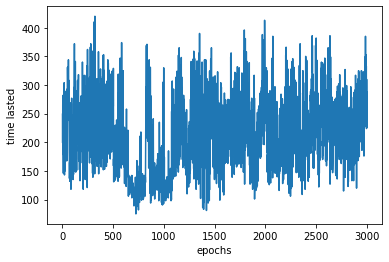

In [338]:
plt.figure()
xs = [i for i in range(1, 3001)]
plt.plot(xs, time_lasted)
plt.xlabel("epochs")
plt.ylabel("time lasted")
plt.show()